In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

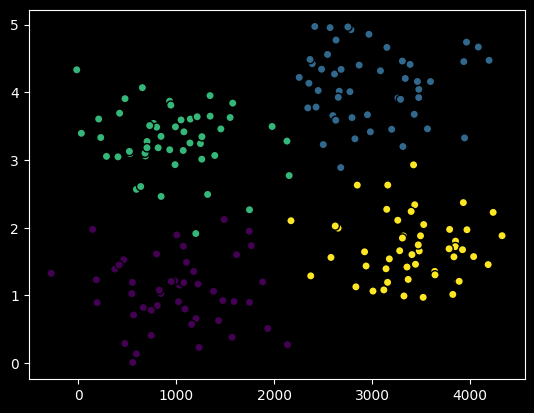

In [2]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", linewidth=1)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(6,), random_state=1).fit(X, y)

In [4]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [5]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

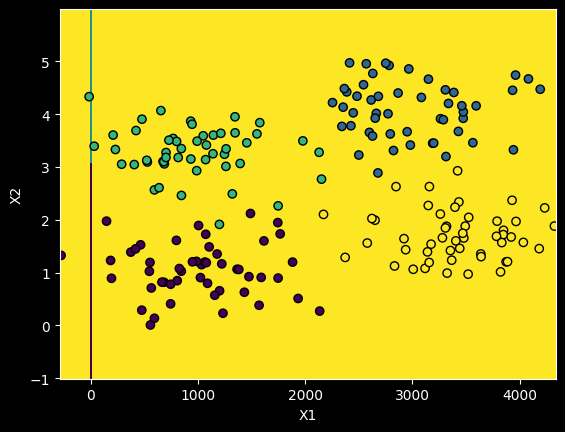

In [6]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", linewidth=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

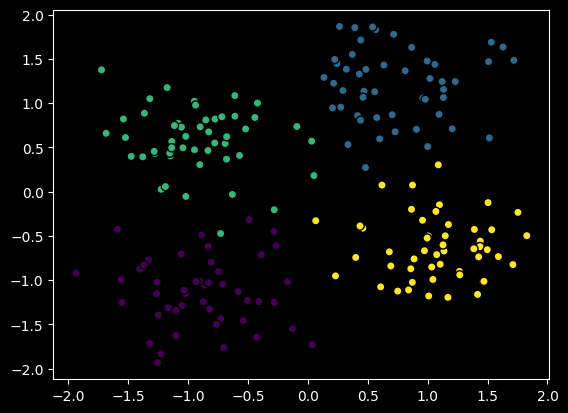

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X, y)

X_scaled = scaler.transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors="black", linewidth=1)

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=False).fit(
    X_scaled, y
)
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 2,  1, 47,  0],
       [ 1,  1,  0, 48]], dtype=int64)

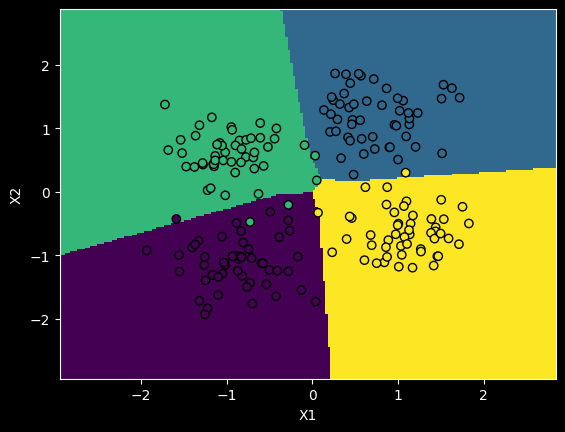

In [9]:
X0 = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors="black", linewidth=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [10]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

ModuleNotFoundError: No module named 'tensorflow'